## 1. Regression discontinuity: banking recovery
<p>Project description from <a href="https://www.datacamp.com/projects/504">https://www.datacamp.com/projects/504</a>
<p>After a debt has been legally declared "uncollectable" by a bank, the account is considered "charged-off." But that doesn't mean the bank <strong><em>walks away</em></strong> from the debt. They still want to collect some of the money they are owed. The bank will score the account to assess the expected recovery amount, that is, the expected amount that the bank may be able to receive from the customer in the future. This amount is a function of the probability of the customer paying, the total debt, and other factors that impact the ability and willingness to pay.</p>
<p>The bank has implemented different recovery strategies at different thresholds (\$1000, \$2000, etc.) where the greater the expected recovery amount, the more effort the bank puts into contacting the customer. For low recovery amounts (Level 0), the bank just adds the customer's contact information to their automatic dialer and emailing system. For higher recovery strategies, the bank incurs more costs as they leverage human resources in more efforts to obtain payments. Each additional level of recovery strategy requires an additional \$50 per customer so that customers in the recovery strategy level 1 cost the company \$50 more than those in Level 0. Customers in Level 2 cost \$50 more than those in Level 1, etc. </p>
<p><strong>The big question</strong>: does the extra amount that is recovered at the higher strategy level exceed the extra \$50 in costs? In other words, was there a jump (also called a "discontinuity") of more than \$50 in the amount recovered at the higher strategy level? <b>[1] [2] </p>
<p> <b> Regression discontinuity </b> <i> <p>Plots from <b> [1]</b></i>
<img src="https://assets.datacamp.com/production/project_504/img/Regression Discontinuity graph.png"/> 

In [11]:
# Import modules and look at the first five rows of the dataset

import pandas as pd
import numpy as np

df = pd.read_csv("datasets/bank_data.csv")
df.head()

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
0,2030,194,263.540,Level 0 Recovery,19,Male
1,1150,486,416.090,Level 0 Recovery,25,Female
2,380,527,429.350,Level 0 Recovery,27,Male
3,1838,536,296.990,Level 0 Recovery,25,Male
4,1995,541,346.385,Level 0 Recovery,34,Male


## 2. Graphical exploratory data analysis

<p>Different recovery strategies are used at different thresholds. We are going to focus on level 0 and level 1 recovery.
<p>We know that the customers in Level 1 (expected recovery amounts between \$1001 and \$2000) received more attention from the bank and, by definition, they had higher expected recovery amounts than the customers in Level 0 (between \$1 and \$1000).</p>
<p>Here's a quick summary of the Levels and thresholds again:</p>
<ul>
<li>Level 0: Expected recovery amounts &gt;\$0 and &lt;=\$1000</li>
<li>Level 1: Expected recovery amounts &gt;\$1000 and &lt;=\$2000</li>
<li>The threshold of \$1000 separates Level 0 from Level 1</li>
</ul>

<p> To start off, we can look at the scatter plot of the actual recovery amount(y) as a function of the expected recovery amount (x). We want to focus our attention at the range just below and just above the threshold. I.e. \$900 <= x < \$1100. <p> This range covers Levels 0 and 1. We want to identify whether or not we see a discontinuity (jump) around the \$1000 threshold.</p>

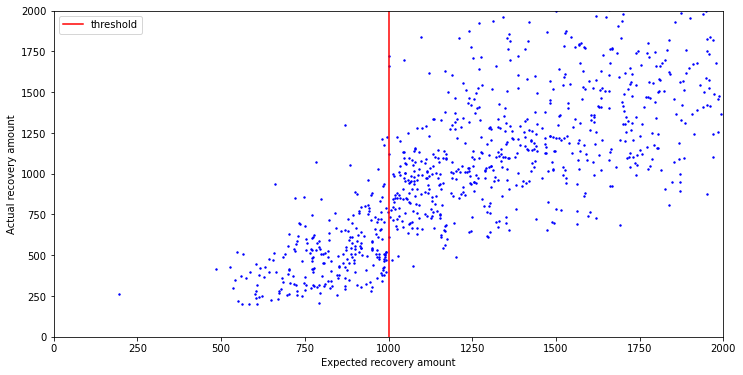

In [36]:
# Scatter plot of Actual recovery amount vs. expected recovery amount to visually check for regression discontinuity

from matplotlib import pyplot as plt
%matplotlib inline
plt.figure(figsize = (12, 6))
plt.axvline(x = 1000, color = "r", label = "threshold") #draw line to show threshold
plt.scatter(x=df["expected_recovery_amount"], y=df["actual_recovery_amount"], c="b", s=2)
plt.xlim(0, 2000)
plt.ylim(0, 2000)
plt.xlabel("Expected recovery amount")
plt.ylabel("Actual recovery amount")
plt.legend(loc=2)
plt.show()

No obvious discontinuity visible.

<p>A key question is whether there are other factors besides expected recovery amount that also varied systematically across the \$1000 threshold. For example, does the customer age show a jump (discontinuity) at the \$1000 threshold or does that age vary smoothly?

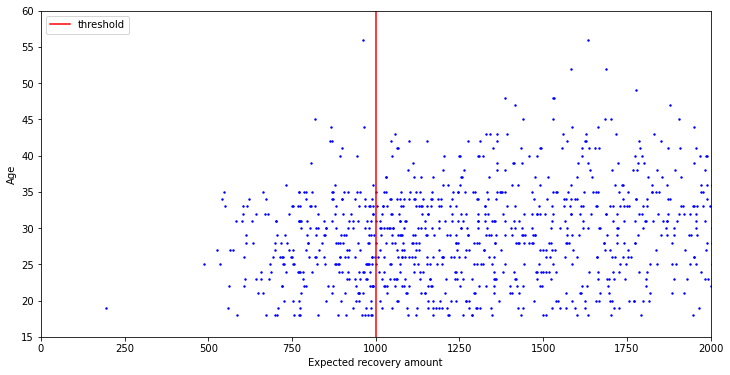

In [37]:
# Scatter plot of age vs. expected recovery amount

from matplotlib import pyplot as plt
%matplotlib inline
plt.figure(figsize = (12, 6))
plt.axvline(x = 1000, color = "r", label = "threshold") #draw line to show threshold
plt.scatter(x=df["expected_recovery_amount"], y=df["age"], c="b", s=2)
plt.xlim(0, 2000)
plt.ylim(15, 60)
plt.xlabel("Expected recovery amount")
plt.ylabel("Age")
plt.legend(loc=2)
plt.show()

No discontinuity visible in customer age around the threshold.

## 3. Statistical test:  age vs. expected recovery amount
<p>"Assuming that the average properties of customers just above and just below the threshold are similar, this allows estimation of the effect of the intervention at the threshold (Local Average Treatment Effect, LATE)." <b>[3] </b> So, we want to be able to conclude that differences in the actual recovery amount are due to the higher recovery strategy and not due to some other difference in factors such as age or sex.
<p>The scatterplot of age vs expected recovery amount did not show heterogeneity but to check this, we can use a statistical test. The Kruskal-Wallis One-Way ANOVA test can be used to determine where there is a difference in the customer age just above and just below the threshold. As it is a non-parametric test, it doesn't assume a normal distribution of the residuals. <p> We make the assumption that the distribution is identically shaped and scaled in the selected range (\$900 - \$1100) for both recovery groups, except for any difference in the medians.<p> The null hypothesis is that the medians of the groups are equal.<p> The alternative hypothesis is that the one population median of one group is different from the population median of the other group. <b>[4]</b><p> Our assumptions are as follows:<p>
<ul>
<li>Samples are random.
<li>The two samples are mutually independent.
<li>The measurement scale is ordinal (recovery strategy 0 & 1), and the variables are continuous.
</ul>

In [22]:
# Import stats module scipy
from scipy import stats

# Calculate average age in the selected range (900-1100) around the threshold
era_900_1100 = df.loc[(df["expected_recovery_amount"] < 1100) & 
                      (df["expected_recovery_amount"] >= 900)]
by_recovery_strategy = era_900_1100.groupby(["recovery_strategy"]) # separate the two groups
by_recovery_strategy["age"].describe().unstack()

# Kruskal-Wallis test 
level_0_age = era_900_1100.loc[df["recovery_strategy"] == "Level 0 Recovery"]["age"]
level_1_age = era_900_1100.loc[df["recovery_strategy"] == "Level 1 Recovery"]["age"]
stats.kruskal(level_0_age, level_1_age) 

KruskalResult(statistic=3.4572342749517513, pvalue=0.06297556896097407)

The difference in the median age between the two groups of level 0 and level 1 recovery is not statistically significant (p = 0.063 > 0.05). I.e. we accept the null hypothesis and reject the alternative hypothesis.

## 4. Statistical test:  sex vs. expected recovery amount
<p>Now, it is important to see if there is a difference in the sex of the population in our selected range (\$900 - \$1100).
<p>This can be assessed statistically by developing cross-tabs as well as doing chi-square tests of the number of customers that are male vs. female.</p>
Similarly to the above, our null hypothesis is that there is no difference in the number of females and males across the two recovery strategy levels and the alternative hypothesis is that there is a difference.
<p> "A crosstab is a table showing the relationship between two or more variables. Where the table only shows the relationship between two categorical variables, a crosstab is also known as a contingency table." <b> [5] </b>

In [33]:
# Number of customers in each recovery strategy within our selected range (900-1100 dollars)
# pandas.crosstab(index, columns, values=None, rownames=None, colnames=None, aggfunc=None, 
#                 margins=False, margins_name='All', dropna=True, normalize=False)
#

crosstab = pd.crosstab(df.loc[(df["expected_recovery_amount"] < 1100) & 
                              (df["expected_recovery_amount"] >= 900)]["recovery_strategy"], 
                       df["sex"]) # dropna=True - do not include columns whose entries are all NaN.
 
print(crosstab)

# Chi-square test
chi2_stat, p_val, dof, ex = stats.chi2_contingency(crosstab)
print("p_val = ", p_val)

sex                Female  Male
recovery_strategy              
Level 0 Recovery       32    57
Level 1 Recovery       39    55
p_val =  0.5377947810444592


There is no statistically significant difference between the number of females and males in the population on either side of our threshold within the range of (\\$900 - \\$1100) (p = 0.538 > 0.05).

## 5. Graphical exploratory data analysis of actual vs expected recovery amount

We can look at our selected range (\\$900 - \\$1100) around the threshold more closely to see if we can see any discontinuity when zooming in as in section 2 we did not see any visible discontinuity.

No handles with labels found to put in legend.


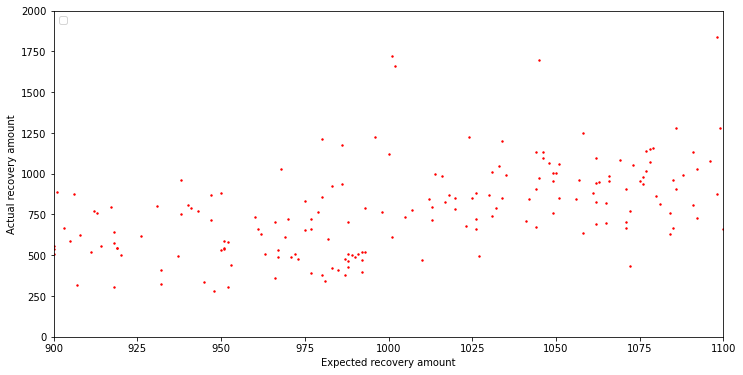

In [39]:
plt.figure(figsize = (12, 6))
plt.scatter(x=df["expected_recovery_amount"], y=df["actual_recovery_amount"], c="r", s=2)
plt.xlim(900, 1100)
plt.ylim(0, 2000)
plt.xlabel("Expected recovery amount")
plt.ylabel("Actual recovery amount")
plt.legend(loc=2)
plt.show()

Still no obvious discontinuity visible.

## 6. Statistical analysis:  recovery amount
<p>As we did with age, we can perform statistical tests to see if the actual recovery amount has a discontinuity above the \$1000 threshold. We are going to do this for two different windows of the expected recovery amount \$900 to \$1100 and for a narrow range of \$950 to \$1050 to see if our results are consistent.</p>
<p>Again, we will use the Kruskal-Wallis test.</p>
<p>
1. We will first compute the average actual recovery amount for those customers just below and just above the threshold using a range from \$900 to \$1100.  <p> 
2. Then we will perform a Kruskal-Wallis test to see if the actual recovery amounts are different just above and just below the threshold. <p>
3. Once we have done these, we will repeat steps 1. and 2. for a smaller window of \$950 to \$1050.</p>

In [79]:
# Create column from multiindex
by_recovery_strategy["actual_recovery_amount"].describe().unstack()

# Calculate average actual recovery amount just below and above the threshold
# and erform Kruskal-Wallis test
level_0_actual = era_900_1100.loc[df["recovery_strategy"]=="Level 0 Recovery"]["actual_recovery_amount"]
level_1_actual = era_900_1100.loc[df["recovery_strategy"]=="Level 1 Recovery"]["actual_recovery_amount"]
stats.kruskal(level_0_actual, level_1_actual) 

KruskalResult(statistic=65.37966302528878, pvalue=6.177308752803109e-16)

In [41]:
# Repeat for a smaller range of $950 to $1050
era_950_1050 = df.loc[(df["expected_recovery_amount"] < 1050) & 
                      (df["expected_recovery_amount"] >= 950)]

level_0_actual = era_950_1050.loc[df["recovery_strategy"]=="Level 0 Recovery"]["actual_recovery_amount"]
level_1_actual = era_950_1050.loc[df["recovery_strategy"]=="Level 1 Recovery"]["actual_recovery_amount"]
stats.kruskal(level_0_actual, level_1_actual)

KruskalResult(statistic=30.246000000000038, pvalue=3.80575314300276e-08)

For both ranges of \\$900 - \\$1100 and \\$950 - \\$1050, the difference in the median actual recovery amount between the two groups of level 0 and level 1 recovery is statistically significant (p-values < 0.001, almost 0). I.e. we accept the alternative hypothesis and reject the null hypothesis.

## 7. Regression modeling: no threshold
We now want to take a regression-based approach to estimate the program impact at the $1000 threshold using data that is just above and below the threshold.

We will build two models. The first model does not have a threshold while the second will include a threshold.

The first model predicts the actual recovery amount (dependent variable, y) as a function of the expected recovery amount (independent variable, x). We expect that there will be a strong positive relationship between these two variables.

We will examine the adjusted R-squared to see the percent of variance explained by the model. In this model, we are not representing the threshold but simply seeing how the variable used for assigning the customers (expected recovery amount) relates to the outcome variable (actual recovery amount).

In [64]:
# Import statsmodels for analysis
import statsmodels.api as sm

# Define X and y
X = era_900_1100["expected_recovery_amount"]
y = era_900_1100["actual_recovery_amount"]
X = sm.add_constant(X)

# Linear regression model
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the model summary statistics
model.summary()

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     actual_recovery_amount   R-squared:                       0.261
Model:                                OLS   Adj. R-squared:                  0.256
Method:                     Least Squares   F-statistic:                     63.78
Date:                    Wed, 01 Mar 2023   Prob (F-statistic):           1.56e-13
Time:                            18:01:48   Log-Likelihood:                -1278.9
No. Observations:                     183   AIC:                             2562.
Df Residuals:                         181   BIC:                             2568.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -1978.7597    347.741     -5.690      0.000   -2664.907   -1292.612
expected_recovery_amount     2.7577      0.345      7.986      0.000       2.076       3.439
==============================================================================
Omnibus:                       64.493   Durbin-Watson:                   1.777
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              185.818
Skew:                           1.463   Prob(JB):                     4.47e-41
Kurtosis:                       6.977   Cond. No.                     1.80e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Assumptions of linear regression:
<ul>
<li>Linear relationship between the dependent and the independent variable. This was checked visually in the scatterplot in section 2 and section 5.
<li>There should be independence of observations. As the Durbin-Watson statistic is close to 2 (1.777), this assumption is met.
<li>The residual data needs to show homoscedasticity. This was checked using the Omnibus test above, however, the value we were looking for was supposed to be a value close to zero. As this was not the case, I will double-check this the Bruesch-Pagan's test. <b> [6] 
</ul>

In [63]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
import statsmodels

name = ["Lagrange multiplier statistic", "p_value", 
        "f_value", "f p_value"]
test = sms.het_breuschpagan(model.resid, model.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 1.6210279127530782),
 ('p_value', 0.20294851937408015),
 ('f_value', 1.6176409471940962),
 ('f p_value', 0.20505276420257176)]

We see that the Bruesch-Pagan's test is statistically significant at p = 1.274e-8, p < 0.001.<p> Our null hypothesis is that homoscedasticity is present which we reject and we accept the alternative hypothesis, meaning heterogeneity of the residual data. <p> In order to account for the heteroscedasticity in the data, one has to select a heteroscedasticity consistent covariance matrix (HCCM) and pass it in the “cov_type=” argument apart of the .fit() method. What is HCCM? Here is a nice read if interested more on this. There are a few HCCMs to choose from:
<ul>
<li>HC0, not good on sample size ≤ 250
<li>HC1, not good on sample size ≤ 250
<li>HC2, good on sample size ≤ 250
<li>HC3, which out performs HC0, HC1, and HC2 when sample size ≤ 250</ul>
Little difference in performance when sample is ≥ 500 <b> [6] </b> <p> We will use HC3 in our model. 

In [76]:
# Define X and y
X = era_900_1100["expected_recovery_amount"]
y = era_900_1100["actual_recovery_amount"]
X = sm.add_constant(X)

# Linear regression model
model = sm.OLS(y, X).fit(cov_type="HC3")
predictions = model.predict(X)

# Print out the model summary statistics
model.summary()

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     actual_recovery_amount   R-squared:                       0.261
Model:                                OLS   Adj. R-squared:                  0.256
Method:                     Least Squares   F-statistic:                     70.52
Date:                    Wed, 01 Mar 2023   Prob (F-statistic):           1.29e-14
Time:                            18:21:09   Log-Likelihood:                -1278.9
No. Observations:                     183   AIC:                             2562.
Df Residuals:                         181   BIC:                             2568.
Df Model:                               1                                         
Covariance Type:                      HC3                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -1978.7597    325.892     -6.072      0.000   -2617.497   -1340.022
expected_recovery_amount     2.7577      0.328      8.398      0.000       2.114       3.401
==============================================================================
Omnibus:                       64.493   Durbin-Watson:                   1.777
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              185.818
Skew:                           1.463   Prob(JB):                     4.47e-41
Kurtosis:                       6.977   Cond. No.                     1.80e+04
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 8. Regression modeling: adding true threshold
<p>Now we create the second model which adds an indicator of the true threshold to the model (in this case at \$1000).  </p>
<p>We will create an indicator variable (either a 0 or a 1) that represents whether or not the expected recovery amount was greater than \$1000. When we add the true threshold to the model, the regression coefficient for the true threshold represents the additional amount recovered due to the higher recovery strategy.  That is to say, the regression coefficient for the true threshold measures the size of the discontinuity  for customers just above and just below the threshold (aka the Local Average Treatment Effect, LATE).</p>
<p>If the higher recovery strategy helped recovery more money, then the regression coefficient of the true threshold will be greater than zero.  If the higher recovery strategy did not help recover more money, then the regression coefficient will not be statistically significant.</p>

In [80]:
# Create indicator (0 or 1) for expected recovery amount >= $1000
# numpy.where(condition, [x, y, ]/)
#   return elements chosen from x or y depending on condition.

df["indicator_1000"] = np.where(df["expected_recovery_amount"] < 1000, 0, 1)

# Select range
era_900_1100 = df.loc[(df["expected_recovery_amount"] < 1100) & 
                      (df["expected_recovery_amount"] >= 900)]

# Define X and y
X = era_900_1100[["expected_recovery_amount", "indicator_1000"]]
y = era_900_1100["actual_recovery_amount"]
X = sm.add_constant(X)

# Build linear regression model
model = sm.OLS(y,X).fit()

# Print the model summary
model.summary()

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     actual_recovery_amount   R-squared:                       0.314
Model:                                OLS   Adj. R-squared:                  0.307
Method:                     Least Squares   F-statistic:                     41.22
Date:                    Wed, 01 Mar 2023   Prob (F-statistic):           1.83e-15
Time:                            18:30:05   Log-Likelihood:                -1272.0
No. Observations:                     183   AIC:                             2550.
Df Residuals:                         180   BIC:                             2560.
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        3.3440    626.274      0.005      0.996   -1232.440    1239.128
expected_recovery_amount     0.6430      0.655      0.981      0.328      -0.650       1.936
indicator_1000             277.6344     74.043      3.750      0.000     131.530     423.739
==============================================================================
Omnibus:                       65.977   Durbin-Watson:                   1.906
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              186.537
Skew:                           1.510   Prob(JB):                     3.12e-41
Kurtosis:                       6.917   Cond. No.                     3.37e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.37e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Here we are still seeing that the Omnibus test result is not close to zero so the same covariance matrix will be passed to our model, HC3.

In [81]:
df["indicator_1000"] = np.where(df["expected_recovery_amount"] < 1000, 0, 1)

# Select range
era_900_1100 = df.loc[(df["expected_recovery_amount"] < 1100) & 
                      (df["expected_recovery_amount"] >= 900)]

# Define X and y
X = era_900_1100[["expected_recovery_amount", "indicator_1000"]]
y = era_900_1100["actual_recovery_amount"]
X = sm.add_constant(X)

# Build linear regression model
model = sm.OLS(y,X).fit(cov_type="HC3")

# Print the model summary
model.summary()

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     actual_recovery_amount   R-squared:                       0.314
Model:                                OLS   Adj. R-squared:                  0.307
Method:                     Least Squares   F-statistic:                     43.07
Date:                    Wed, 01 Mar 2023   Prob (F-statistic):           5.19e-16
Time:                            18:30:20   Log-Likelihood:                -1272.0
No. Observations:                     183   AIC:                             2550.
Df Residuals:                         180   BIC:                             2560.
Df Model:                               2                                         
Covariance Type:                      HC3                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        3.3440    751.446      0.004      0.996   -1469.464    1476.152
expected_recovery_amount     0.6430      0.790      0.814      0.416      -0.905       2.191
indicator_1000             277.6344     90.042      3.083      0.002     101.155     454.113
==============================================================================
Omnibus:                       65.977   Durbin-Watson:                   1.906
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              186.537
Skew:                           1.510   Prob(JB):                     3.12e-41
Kurtosis:                       6.917   Cond. No.                     3.37e+04
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
[2] The condition number is large, 3.37e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The regression coefficient for the true threshold was statistically significant with an estimated impact of around \\$278.  This is greater than the \$50 per customer needed to run this higher recovery strategy.

## 9. Regression modeling: adjusting the window
<p>Before showing this to our manager, we want to convince ourselves that this result wasn't due to choosing an expected recovery amount window of \$900 to \$1100. Let's repeat this analysis for the window from \$950 to \$1050 to see if we get similar results.</p>

In [18]:
# Redefine era_950_1050 so the indicator variable is included
era_950_1050 = df.loc[(df["expected_recovery_amount"] < 1050) & 
                      (df["expected_recovery_amount"] >= 950)]

# Define X and y 
X = era_950_1050[['expected_recovery_amount','indicator_1000']]
y = era_950_1050['actual_recovery_amount']
X = sm.add_constant(X)

# Build linear regression model
model = sm.OLS(y,X).fit()

# Print the model summary
model.summary()

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     actual_recovery_amount   R-squared:                       0.283
Model:                                OLS   Adj. R-squared:                  0.269
Method:                     Least Squares   F-statistic:                     18.99
Date:                    Tue, 28 Feb 2023   Prob (F-statistic):           1.12e-07
Time:                            23:31:24   Log-Likelihood:                -692.92
No. Observations:                      99   AIC:                             1392.
Df Residuals:                          96   BIC:                             1400.
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     -279.5243   1840.707     -0.152      0.880   -3933.298    3374.250
expected_recovery_amount     0.9189      1.886      0.487      0.627      -2.825       4.663
indicator_1000             286.5337    111.352      2.573      0.012      65.502     507.566
==============================================================================
Omnibus:                       39.302   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               82.258
Skew:                           1.564   Prob(JB):                     1.37e-18
Kurtosis:                       6.186   Cond. No.                     6.81e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.81e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<p> For the narrow interval, the regression coefficient for the true threshold was statistically significant (< 0.05) with an estimated impact of around \$287 and a 95 percent confidence interval of \$66 to \$508. Even at the lower bound is therefore is larger than the incremental cost of running the higher recovery strategy which was \$50 per customer.
                                                                                               <p> Therefore, both using a wide (\$900 to \$1100) and narrower window (\$950 to \$1050), the incremental recovery amount at the higher recovery strategy is much greater than the \$50 per customer it costs for the higher recovery strategy.  So we conclude that the higher recovery strategy is worth the extra cost of \$50 per customer.

## Conclusion
<p> Whether we use a wide window (\$900 - \$1100) or a narrower window (\$950 = \$1050), the incremental recovery amount at the higher recovery strategy is much greater than the \$50 per customer it costs for the higher recovery strategy. So we can say that the higher recovery strategy is worth the extra \$50 per customer that the bank is spending.

## References
<p>
1. Friedman H. Which debts are worth the bank's effort?: Data Science Project [Internet]. DataCamp. [cited 2023 Feb 27]. Available from: <a href="https://www.datacamp.com/projects/504">https://www.datacamp.com/projects/504</a><p>
2. Richardson K. Regression discontinuity: banking recovery [Internet]. Regression discontinuity: Banking recovery. [cited 2023 Feb 28]. Available from: <a href="https://rstudio-pubs-static.s3.amazonaws.com/491103_e9cc29ab609247c2aa27e6cc50c11263.html">https://rstudio-pubs-static.s3.amazonaws.com/491103_e9cc29ab609247c2aa27e6cc50c11263.html</a><p>
3. Kruskal–Wallis one-way analysis of variance [Internet]. Wikipedia. Wikimedia Foundation; 2022 [cited 2023 Mar 1]. Available from: <a href="https://en.wikipedia.org/wiki/Kruskal%E2%80%93Wallis_one-way_analysis_of_variance">https://en.wikipedia.org/wiki/Kruskal%E2%80%93Wallis_one-way_analysis_of_variance </a><p>
4. Marinescu I, Triantafillou S, Kording K. Regression discontinuity threshold optimization [Internet]. PLOS ONE. Public Library of Science; [cited 2023 Mar 1]. Available from: <a href="https://journals.plos.org/plosone/article?id=10.1371%2Fjournal.pone.0276755">https://journals.plos.org/plosone/article?id=10.1371%2Fjournal.pone.0276755</a><p>
5. Bock T. What is a Crosstab? [Internet]. Displayr. 2022 [cited 2023 Feb 28]. Available from:<a href="https://www.displayr.com/what-is-a-crosstab/">https://www.displayr.com/what-is-a-crosstab/</a><p>
6. Linear regression [Internet]. Python for Data Science. 2018 [cited 2023 Mar 1]. Available from: <a href="https://pythonfordatascienceorg.wordpress.com/linear-regression-python/">https://pythonfordatascienceorg.wordpress.com/linear-regression-python/</a>